# Imports and reading data

In [1]:
import pandas as pd # data processing
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os
plt.style.use("ggplot")
pd.set_option('display.max_columns', 200)

In [2]:
# create dataframes
df_articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
# df_customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
# df_sample = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv")
# df_transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

# Image Captioning

I first check how many images are in the dataset and which articles have no image.

In [3]:
# import required module
import os
 
# assign directory
directory = '../input/h-and-m-personalized-fashion-recommendations/images'

image_ids = []

# iterate over files in 
# that directory
i=0
for subfolder in os.scandir(directory):
    for image in os.scandir(subfolder):
        image_ids.append(int(image.path[-14:-4]))
        i+=1
print(str(i) + " images")

105100 images


In [4]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
print(df_articles.shape)
print(str(df_articles.shape[0] - i) + " articles have no image")

(105542, 25)
442 articles have no image


Now get a list of all the article ID's without image, so we can exclude them later

In [6]:
articles_without_image = []
df_images = pd.Series(image_ids)

In [7]:
# union of the series 
union = pd.Series(np.union1d(df_images, df_articles['article_id'])) 
  
# intersection of the series 
intersect = pd.Series(np.intersect1d(df_images, df_articles['article_id'])) 
  
# uncommon elements in both the series  
notcommonseries = union[~union.isin(intersect)] 
  
# displaying the result 
print(notcommonseries) 

88        174057028
117       179208001
258       212042043
259       212042066
261       212629004
            ...    
98090     877369001
98669     880333001
102020    901588001
102304    903309002
103775    915362001
Length: 442, dtype: int64


Check which articles have no description

In [8]:
df_articles['detail_desc'].describe()

count                                105126
unique                                43404
top       T-shirt in printed cotton jersey.
freq                                    159
Name: detail_desc, dtype: object

In [9]:
no_description = df_articles.iloc[np.where(pd.isnull(df_articles['detail_desc']))[0]]

In [10]:
no_description

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,2,Medium Dusty,12,Grey,5962,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3040,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,4,Dark,11,Beige,3040,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,426199002,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,426199010,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,8,Dark Grey,4,Dark,12,Grey,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67838,752458001,752458,Poissy boho dress,265,Dress,Garment Full body,1010007,Embroidery,10,White,3,Light,9,White,1310,Dress,A,Ladieswear,1,Ladieswear,6,Womens Casual,1013,Dresses Ladies,NaN
72720,768842001,768842,Andrews set,270,Garment Set,Garment Full body,1010017,Stripe,10,White,3,Light,9,White,6565,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
72721,768842004,768842,Andrews set,270,Garment Set,Garment Full body,1010004,Check,73,Dark Blue,7,Medium,2,Blue,6565,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
93144,856985001,856985,Pogo rope,67,Belt,Accessories,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,3509,Belts,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,NaN


In [11]:
# check intersection of articles without image and articles without description
intersect = pd.Series(np.intersect1d(notcommonseries, no_description['article_id']))
print(intersect)

0     469039021
1     539844003
2     558651001
3     558651003
4     568683001
5     568683003
6     578311001
7     594453002
8     594453003
9     599703001
10    599703002
11    605020002
dtype: int64


Only 11 articles have no image and no description. This means there are 405 articles with an image and without a description. Maybe we can generate a description of the articles using their image.

In [12]:
# small check of one of these items
df_articles.loc[df_articles['article_id']==469039021]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
3879,469039021,469039,Henrik ballerina,86,Ballerinas,Shoes,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,3527,Flats,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN


### Content-based recommender system

following the geeksforgeeks tutorial: https://www.geeksforgeeks.org/movie-recommender-based-on-plot-summary-using-tf-idf-vectorization-and-cosine-similarity/

In [13]:
# an interesting idea might be to include more information in the description,
# so I make another dataframe where the descriptions are extended with the color

In [14]:
# fill NaN descriptions with empty string
df_articles['detail_desc'] = df_articles['detail_desc'].fillna('')
df_articles['detail_desc'].isna().sum()

0

In [15]:
# Combine 'colour_group_name' and 'detail_desc' into a new column 'merged_desc'
df_articles['merged_desc'] = df_articles[['colour_group_name', 'detail_desc']].agg(' '.join, axis=1)
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,merged_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,Black Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,White Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,Off White Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...","Black Microfibre T-shirt bra with underwired, ..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...","White Microfibre T-shirt bra with underwired, ..."


In [16]:
# select relevant columns
df_descriptions = df_articles[['article_id', 'detail_desc', 'merged_desc']]
df_descriptions.head()
print(df_articles.shape)
print(df_descriptions.shape)

(105542, 26)
(105542, 3)


In [17]:
df_descriptions['merged_desc'].isnull().sum()

0

Apply natural language processing techniques:

In [18]:
import nltk 
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('wordnet') 

from nltk import wordnet
  
  
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
  
from nltk.corpus import stopwords 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english')) 
  
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'} 

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [20]:
def preprocess_sentences(text): 
  text = text.lower() 
  temp_sent =[] 
  words = nltk.word_tokenize(text) 
  tags = nltk.pos_tag(words) 
  for i, word in enumerate(words): 
      if tags[i][1] in VERB_CODES:  
          lemmatized = lemmatizer.lemmatize(word, 'v') 
      else: 
          lemmatized = lemmatizer.lemmatize(word) 
      if lemmatized not in stop_words and lemmatized.isalpha(): 
          temp_sent.append(lemmatized) 
          
  finalsent = ' '.join(temp_sent) 
  finalsent = finalsent.replace("n't", " not") 
  finalsent = finalsent.replace("'m", " am") 
  finalsent = finalsent.replace("'s", " is") 
  finalsent = finalsent.replace("'re", " are") 
  finalsent = finalsent.replace("'ll", " will") 
  finalsent = finalsent.replace("'ve", " have") 
  finalsent = finalsent.replace("'d", " would") 
  return finalsent 
  
df_descriptions["desc_processed"]= df_descriptions["detail_desc"].apply(preprocess_sentences) 

/tmp/ipykernel_32/1438084791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions["desc_processed"]= df_descriptions["detail_desc"].apply(preprocess_sentences)


In [21]:
df_descriptions.head()

,article_id,detail_desc,merged_desc,desc_processed
0,108775015,Jersey top with narrow shoulder straps.,Black Jersey top with narrow shoulder straps.,jersey top narrow shoulder strap
1,108775044,Jersey top with narrow shoulder straps.,White Jersey top with narrow shoulder straps.,jersey top narrow shoulder strap
2,108775051,Jersey top with narrow shoulder straps.,Off White Jersey top with narrow shoulder straps.,jersey top narrow shoulder strap
3,110065001,"Microfibre T-shirt bra with underwired, moulde...","Black Microfibre T-shirt bra with underwired, ...",microfibre bra underwired mould lightly pad cu...
4,110065002,"Microfibre T-shirt bra with underwired, moulde...","White Microfibre T-shirt bra with underwired, ...",microfibre bra underwired mould lightly pad cu...


Use processed description to make Vector Space Model

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer 
  
# Vectorizing pre-processed article descripitons using TF-IDF 
tfidfvec = TfidfVectorizer() 
tfidf_article_id = tfidfvec.fit_transform((df_descriptions["desc_processed"]))

In [23]:
tfidf_article_id.size

1432735

Try calculating cosine similarity between vectors

In [24]:
# Finding cosine similarity between vectors 
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
# cos_sim = cosine_similarity(tfidf_article_id, tfidf_article_id) 
# (cosine similarity between first article and every other article)
df_descriptions.loc[:, 'distances'] = cosine_similarity(tfidf_article_id, tfidf_article_id[0])
df_descriptions.head()

/tmp/ipykernel_32/458333747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions.loc[:, 'distances'] = cosine_similarity(tfidf_article_id, tfidf_article_id[0])


,article_id,detail_desc,merged_desc,desc_processed,distances
0,108775015,Jersey top with narrow shoulder straps.,Black Jersey top with narrow shoulder straps.,jersey top narrow shoulder strap,1.00000
1,108775044,Jersey top with narrow shoulder straps.,White Jersey top with narrow shoulder straps.,jersey top narrow shoulder strap,1.00000
2,108775051,Jersey top with narrow shoulder straps.,Off White Jersey top with narrow shoulder straps.,jersey top narrow shoulder strap,1.00000
3,110065001,"Microfibre T-shirt bra with underwired, moulde...","Black Microfibre T-shirt bra with underwired, ...",microfibre bra underwired mould lightly pad cu...,0.24459
4,110065002,"Microfibre T-shirt bra with underwired, moulde...","White Microfibre T-shirt bra with underwired, ...",microfibre bra underwired mould lightly pad cu...,0.24459


# Using pretrained model for image captioning (Vision Transformer model (ViT))
)
as described in this tutorial: https://michael-franke.github.io/npNLG/08-grounded-LMs/08c-NIC-pretrained.html

In [26]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

matplotlib==3.7.2
nltk==3.2.4
numpy==1.23.5
pandas==2.0.3
scikit-learn==1.2.2
seaborn==0.12.2


In [4]:
##################################################
## import packages
##################################################

from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle
# from torchvision import transforms
# from datasets import load_dataset
# import torch.nn as nn
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [5]:
pip show transformers

Name: transformers
Version: 4.33.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /opt/conda/lib/python3.10/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [7]:
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Now that all the necessary parts are downloaded we can try to generate an image caption.

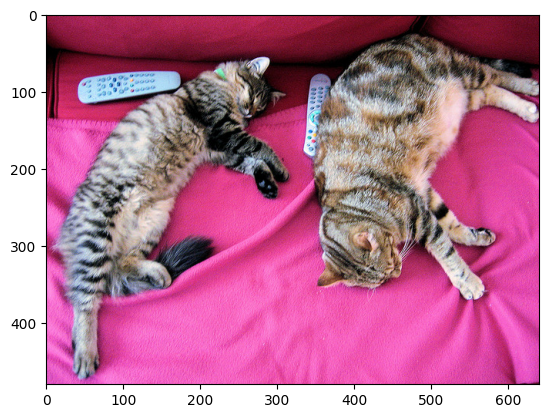

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


a cat and a cat laying on a blanket on the floor 


In [8]:
def show_n_generate(image, greedy = True, model = model_raw):
    pixel_values   = image_processor(image, return_tensors ="pt").pixel_values
    plt.imshow(np.asarray(image))
    plt.show()

    if greedy:
        generated_ids  = model.generate(pixel_values, max_new_tokens = 30)
    else:
        generated_ids  = model.generate(
            pixel_values,
            do_sample=True,
            max_new_tokens = 30,
            top_k=5)
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_text)

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# url = "https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/pics/06-3DS-example.jpg"
# url = "https://img.welt.de/img/sport/mobile102025155/9292509877-ci102l-w1024/hrubesch-rummenigge-BM-Berlin-Gijon-jpg.jpg"
# url = "https://faroutmagazine.co.uk/static/uploads/2021/09/The-Cover-Uncovered-The-severity-of-Rage-Against-the-Machines-political-message.jpg"
# url = "https://media.npr.org/assets/img/2022/03/13/2ukraine-stamp_custom-30c6e3889c98487086d76869f8ba6a8bfd2fd5a1.jpg"

image = Image.open(requests.get(url, stream =True).raw)
show_n_generate(image, greedy = False)

What if we try an image from the dataset?

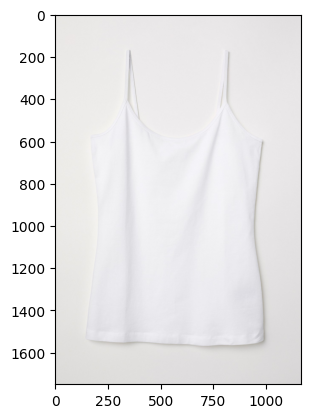

a white shirt and a black shirt 


In [9]:
path = '/kaggle/input/h-and-m-personalized-fashion-recommendations/images/010/0108775044.jpg'
img = Image.open(path)
# plt.imshow(np.asarray(img))
show_n_generate(img, greedy = False)

This pretrained model does not seem to be performing as well as I hoped. Perhaps some training of the model on the descriptions we have available would improve the captions, but then we would be trying to generate the descriptions we already have. A trained model like this might have been helpful to generate descriptions for articles that have an image but no description, but since there are only 405 articles like this, it does not seem like a meaningfull plan.

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.Image.Image'>


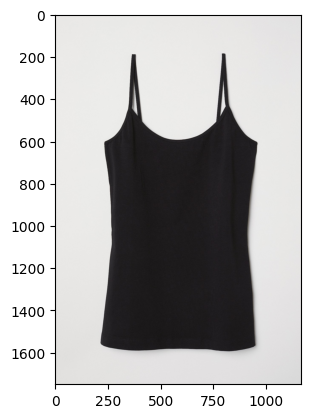

a black and gray striped table top with a white background 


In [10]:
def generate_caption(img_path):
    img = Image.open(img_path, mode='r')
    print(type(img))
    pic = np.array(img)
    new_image = Image.fromarray(pic)
    print(type(new_image))
    show_n_generate(new_image, greedy = False)
    img.close()

# pick image from dataset
fp = '/kaggle/input/h-and-m-personalized-fashion-recommendations/images/010/0108775015.jpg'
generate_caption(fp)

# BLIP 2 model

In [1]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
torch.cuda.empty_cache()

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", device_map={"": 0}, torch_dtype=torch.float16
)  # doctest: +IGNORE_RESULT

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(np.asarray(image))

NameError: name 'Image' is not defined

In [ ]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

In [ ]:
question = "What do you see?"

prompt = "Question: What do you see? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

context = [
    (question, generated_text)
]

In [ ]:
question = "Can you describe with more detail?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"
print(prompt)

inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

In [ ]:
path = '/kaggle/input/h-and-m-personalized-fashion-recommendations/images/010/0108775044.jpg'
img = Image.open(path)
plt.imshow(np.asarray(img))

In [ ]:
inputs = processor(img, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, min_length = 13)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Now that the model is working we try it on multiple images

In [ ]:
# import required module
import os
 
# assign directory
directory = '../input/h-and-m-personalized-fashion-recommendations/images'

image_ids = []

# iterate over files in 
# that directory
i=0
limit = 10
for subfolder in os.scandir(directory):
    for image in os.scandir(subfolder):
        path = image.path
        with Image.open(path) as img:
            # plt.imshow(np.asarray(img))
            inputs = processor(img, return_tensors="pt").to(device, torch.float16)
            generated_ids = model.generate(**inputs, min_length=12) # use min_length to increase caption length
            generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
            print(generated_text)

        i+=1
        
        if i > limit:
            break
    if i > limit:
        break

print(str(i) + " images")

In [ ]:
path = '../input/h-and-m-personalized-fashion-recommendations/images/057/0570806001.jpg'
img = Image.open(path)
plt.imshow(np.asarray(img))

In [ ]:
df_articles.head()

### Generating new description for every article

In [ ]:
# changing dataframe index to article_id

df_descriptions.set_index('article_id', inplace=True)

In [ ]:
df_descriptions.head()

In [ ]:
import sys

# assign directory
directory = '../input/h-and-m-personalized-fashion-recommendations/images'

image_ids = []

# iterate over files in 
# that directory
i=0
limit = 10
for subfolder in os.scandir(directory):
    for image in os.scandir(subfolder):
        path = image.path
        with Image.open(path) as img:
            article_id = int(image.path[-14:-4])
            print(article_id)
            if df_descriptions.loc[article_id, ['generated_description']].isna().bool():
                # only generate description if it does not yet exist
                inputs = processor(img, return_tensors="pt").to(device, torch.float16)
                generated_ids = model.generate(**inputs, min_length=12)
                generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
                df_descriptions.loc[article_id,['generated_description']] = generated_text
        i+=1
        
        # progress bar
        progress = i/1055
        #sys.stdout.write("Progress: %d/1055   \r" % (i) )
        
        if i >= limit:
            break
    if i >= limit:
        break
print("\n")
print(str(i) + " images")

In [ ]:
# check out some generated descriptions
df_descriptions.loc[[570177001,
575944002,
576129001,
570806001,
572155001,
576693003,
577759003,
578630014,
577327002,
570579003], 'generated_description']

In [ ]:
df_descriptions.head()